# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import seaborn as sns

# **Data Visualization**

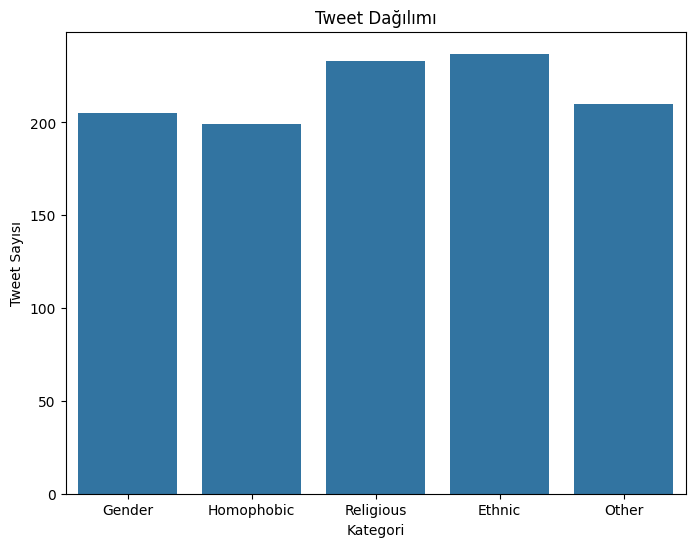

In [ ]:
# Verileri yükle
targets = pd.read_csv('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target based/all_targets/target_all_other.csv')
# Nefret içeren ve içermeyen tweet'lerin sayısını görselleştir
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=targets)
ax.set_title('Tweet Dağılımı')
ax.set_xlabel('Kategori')
ax.set_ylabel('Tweet Sayısı')
plt.xticks([0, 1,2,3,4], ['Gender', 'Homophobic','Religious','Ethnic','Other'])  # Etiket isimlerini belirtiniz
plt.show()

# **Normalization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
# nltk kütüphanesinden Türkçe stop words yükleyelim
import nltk

def frekans(label,name):
    nltk.download('stopwords')
    turkish_stopwords = stopwords.words('turkish')

    # Nefret içeren tweet'leri filtrele
    nefret_tweets = targets[targets['label'] == label]['text']

    # En sık geçen kelimeleri say (Türkçe stop words ile)
    vectorizer = CountVectorizer(stop_words=turkish_stopwords, max_features=10)
    nefret_counts = vectorizer.fit_transform(nefret_tweets)
    sum_words = nefret_counts.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Kelime frekanslarını çubuk grafikte göster
    words_df = pd.DataFrame(words_freq, columns=['word', 'count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=words_df)
    plt.title(f'{name} nefretinde En Sık Geçen Kelimeler')
    plt.xlabel('Sayı')
    plt.ylabel('Kelime')
    plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


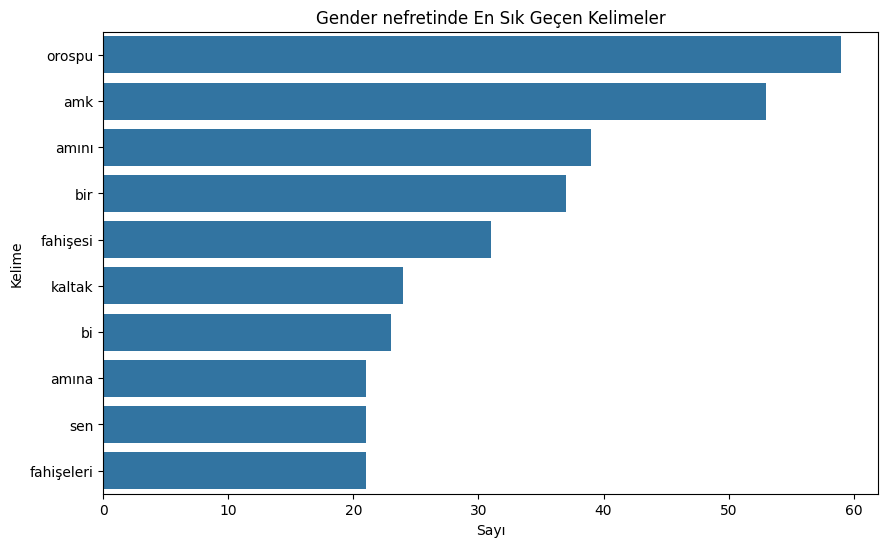

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


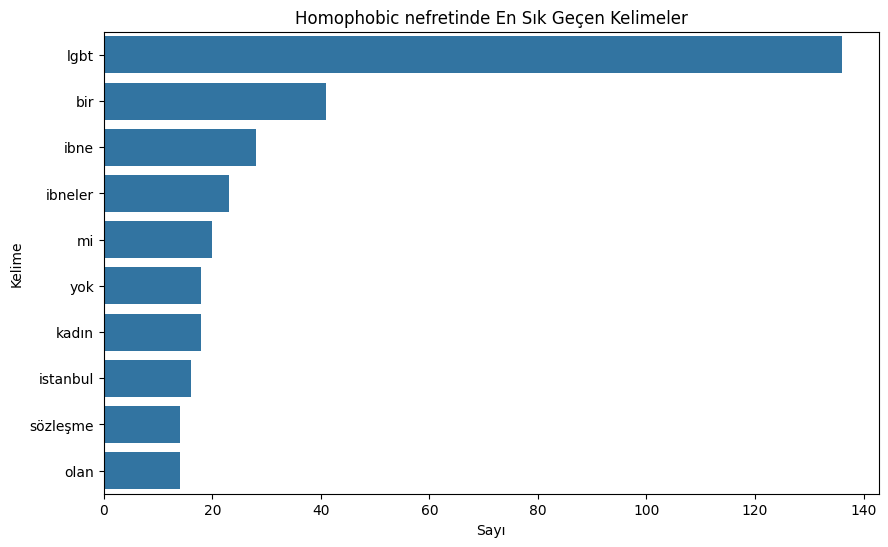

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


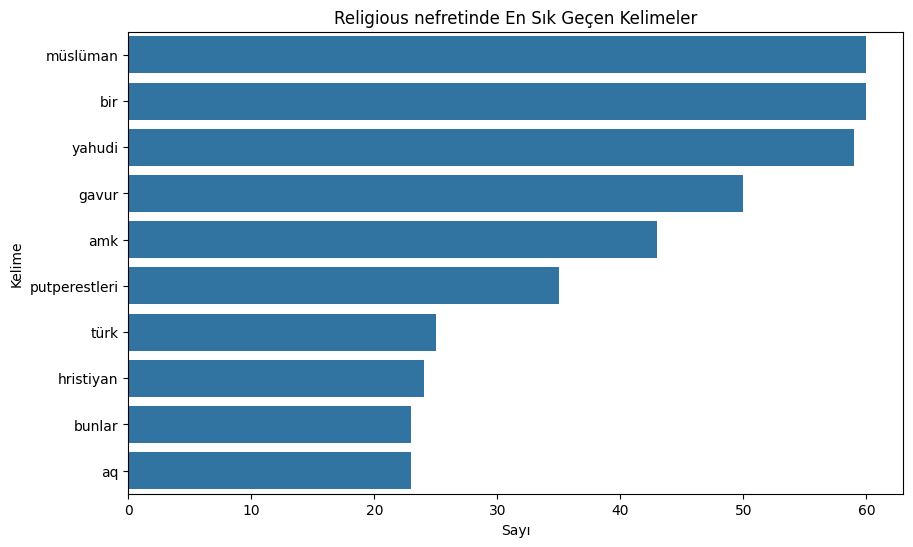

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


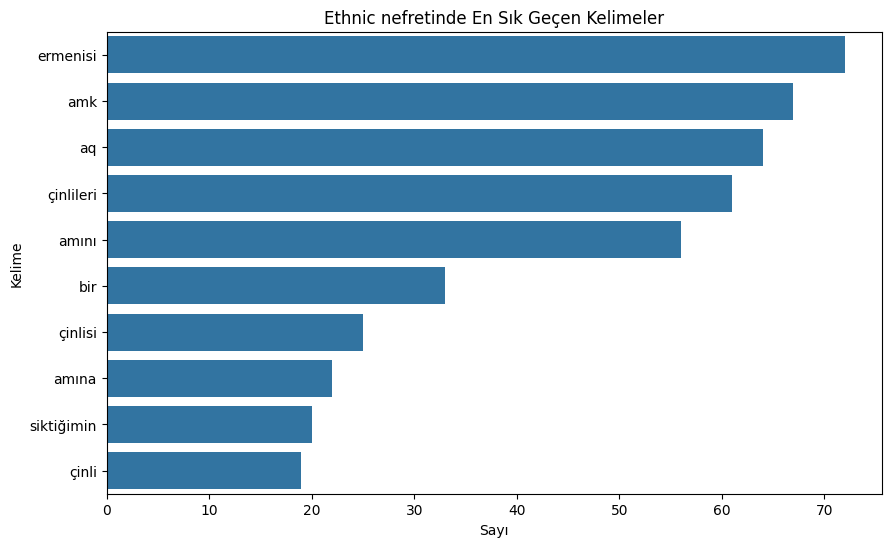

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


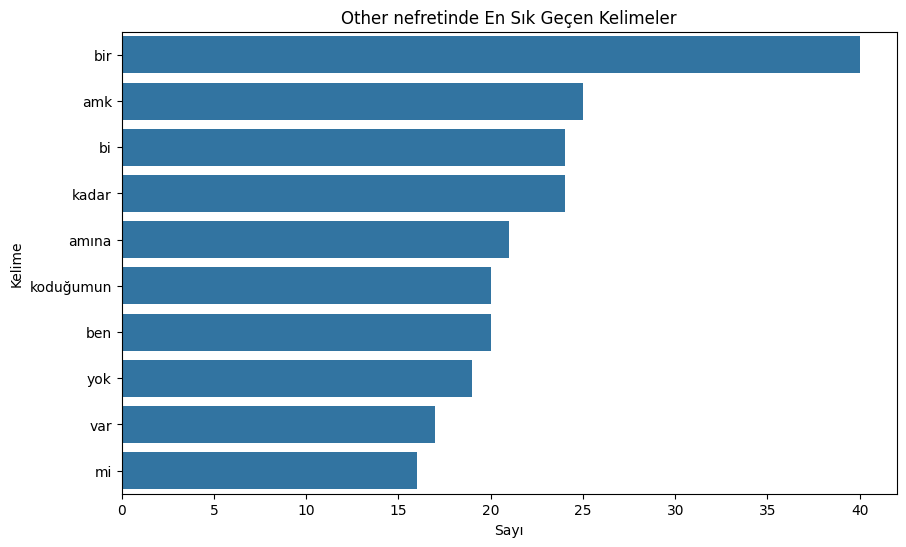

In [ ]:
import re

def normalize_text(text):
    #Kullanıcı adlarını kaldırır
    #text = re.sub(r'([@][A-Za-z0-9_]+)|(\w+:\/\/\S+)','', text)

    text = re.sub(r'@\w+', '', text)
    # Tüm harfleri küçük harfe çevir (uncased model kullanılıyorsa)
    text = text.lower()

    # URL'leri kaldır
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # HTML etiketlerini kaldır
    text = re.sub(r'<.*?>', '', text)

    # Noktalama işaretleri dışındaki özel karakterleri kaldır
    text = re.sub(r'[^a-zA-Z0-9ığüşöçİĞÜŞÖÇ\s]', '', text)

    # Ekstra boşlukları kaldır
    text = re.sub(r'\s+', ' ', text).strip()


    #Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    emoji_pattern.sub(r' ', text)

    return text
targets['text'] = targets['text'].apply(normalize_text)
frekans(0,'Gender')
frekans(1,'Homophobic')
frekans(2,'Religious')
frekans(3,'Ethnic')
frekans(4,'Other')

# **Splitting Data Into Train, Test, Val**

In [ ]:
targets = targets.sample(frac=1, random_state=42).reset_index(drop=True)
# Veriyi eğitim, doğrulama ve test setlerine bölün
train_data, temp_data = train_test_split(targets, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [ ]:
X_train=train_data['text']
y_train=train_data['label']
X_val=val_data['text']
y_val=val_data['label']
X_test = test_data['text']
y_test = test_data['label']

# **Load Model and Tokenizer**

In [ ]:
!pip install preprocess

In [ ]:
!git clone git@github.com:ViralLab/TurkishBERTweet.git
!cd TurkishBERTweet
!python -m venv venv
!source venv/bin/activate

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install peft
!pip install transformers

Cloning into 'TurkishBERTweet'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
/bin/bash: line 1: cd: TurkishBERTweet: No such file or directory
The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/venv/bin/python3

/bin/bash: line 1: venv/bin/activate: No such file or directory
Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.7/857.7 MB 788.5 kB/s eta 0:00:00
   

In [ ]:
from peft import (
    PeftModel,
    PeftConfig,
)

from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer)
import preprocess


peft_model = "VRLLab/TurkishBERTweet-Lora-HS"
peft_config = PeftConfig.from_pretrained(peft_model)

# loading Tokenizer
padding_side = "right"
tokenizer = AutoTokenizer.from_pretrained(
    peft_config.base_model_name_or_path, padding_side=padding_side
)
if getattr(tokenizer, "pad_token_id") is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

id2label_hs = {0: "Gender", 1: "Homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}
turkishBERTweet_hs = AutoModelForSequenceClassification.from_pretrained(
    peft_config.base_model_name_or_path, return_dict=True, num_labels=len(id2label_hs), id2label=id2label_hs
)
#turkishBERTweet_hs = PeftModel.from_pretrained(turkishBERTweet_hs, peft_model)

# Tokenizasyon ve veri kümesini işleyin
def tokenize_function(tweets):
    return tokenizer(tweets, padding='max_length', truncation=True)

train_encodings = tokenize_function(X_train.tolist())
val_encodings = tokenize_function(X_val.tolist())
test_encodings = tokenize_function(X_test.tolist())

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at VRLLab/TurkishBERTweet and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


# **Set Training Parameters and Start Training**

In [ ]:
# PyTorch veri setlerini hazırla
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Define the compute_metrics function
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    accuracy = accuracy_score(labels, pred)
    f1 = f1_score(labels, pred, average='weighted')
    precision = precision_score(labels, pred, average='weighted')
    recall = recall_score(labels, pred, average='weighted')
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Pad the sequences to the same length
def pad_sequences(encodings):
    max_length = max([len(x) for x in encodings['input_ids']])
    padded_encodings = tokenizer.pad(encodings, padding='max_length', max_length=max_length, return_tensors='pt')
    return padded_encodings

train_encodings = pad_sequences(train_encodings)
val_encodings = pad_sequences(val_encodings)
test_encodings = pad_sequences(test_encodings)

train_dataset = TweetDataset(train_encodings, y_train.tolist())
val_dataset = TweetDataset(val_encodings, y_val.tolist())
# Check and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
turkishBERTweet_hs.to(device)
# Eğitim argümanlarını ayarla
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=50,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Trainer'ı kur ve eğitimi başlat
trainer = Trainer(
    model=turkishBERTweet_hs,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


cpu


<ipython-input-19-d95c94ff0219>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.390932,0.861111,0.862275,0.872366,0.861111
2,No log,0.241910,0.916667,0.915699,0.919197,0.916667
3,No log,0.303408,0.925926,0.923609,0.930036,0.925926


<ipython-input-19-d95c94ff0219>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-19-d95c94ff0219>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-19-d95c94ff0219>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=165, training_loss=0.6597514297022964, metrics={'train_runtime': 2131.2056, 'train_samples_per_second': 1.22, 'train_steps_per_second': 0.077, 'total_flos': 89556268228074.0, 'train_loss': 0.6597514297022964, 'epoch': 3.0})

# **Testing The Model**

In [ ]:
# Modeli değerlendirin
test_dataset = TweetDataset(test_encodings, y_test.tolist())
metrics = trainer.evaluate(eval_dataset=test_dataset)
metrics

<ipython-input-19-d95c94ff0219>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.4578799605369568,
 'eval_accuracy': 0.8715596330275229,
 'eval_f1': 0.8714992593343194,
 'eval_precision': 0.8806775170430621,
 'eval_recall': 0.8715596330275229,
 'eval_runtime': 17.5766,
 'eval_samples_per_second': 6.201,
 'eval_steps_per_second': 0.398,
 'epoch': 3.0}

# **Training with Classic ML Methods**

In [ ]:
# Veri vektörizasyonu
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes modeli
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_predictions = nb_model.predict(X_test_vec)

# Logistic Regression modeli
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_predictions = lr_model.predict(X_test_vec)

# Performans metriklerini yazdır
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       0.79      0.83      0.81        18
           2       0.61      0.88      0.72        25
           3       0.84      0.70      0.76        23
           4       0.46      0.29      0.35        21

    accuracy                           0.69       109
   macro avg       0.69      0.68      0.67       109
weighted avg       0.68      0.69      0.67       109

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65        22
           1       0.93      0.72      0.81        18
           2       0.86      0.76      0.81        25
           3       0.94      0.70      0.80        23
           4       0.46      0.90      0.61        21

    accuracy                           0.72       109
   macro avg       0.80      0.73      0.74       109

# **Save Model**

In [ ]:
# Modeli eğittikten sonra
torch.save(model.state_dict(), 'model.pth')

In [ ]:
# Modeli kaydetme
turkishBERTweet_hs.save_pretrained('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweeter_model')
tokenizer.save_pretrained('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer')

('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer/vocab.json',
 '/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer/merges.txt',
 '/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer/added_tokens.json',
 '/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer/tokenizer.json')

# **Load Model**

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Model ve tokenizer'ı yükleyin
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweeter_model')
tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target_based_turkishBerTweet_tokenizer')

# Cihaza taşıyın
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

TEST THE LOADED MODEL WİTH TEST DATASET

In [ ]:
from torch.utils.data import DataLoader
def compute_metrics(preds, labels):
    pred = np.array(preds)
    labels = np.array(labels)
    accuracy = accuracy_score(labels, pred)
    f1 = f1_score(labels, pred, average='weighted')
    precision = precision_score(labels, pred, average='weighted')
    recall = recall_score(labels, pred, average='weighted')
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Modeli değerlendirin
test_dataset = TweetDataset(test_encodings, y_test.tolist())
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

all_preds = []
all_labels = []


with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = np.argmax(logits.cpu().numpy(), axis=1)

        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

metrics = compute_metrics(all_preds, all_labels)
print(metrics)

{'accuracy': 0.963302752293578, 'f1': 0.9634562415458259, 'precision': 0.9670959774170784, 'recall': 0.963302752293578}


# **Test Model**

In [ ]:
# Girdi metin
text = "bu lgbtli sapıklar hep bizi buluyor bunlar defolsun gitsin ibneler"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'bu lgbtli sapıklar hep bizi buluyor bunlar defolsun gitsin ibneler'
Model Tahmini: homophobic


In [ ]:
# Girdi metin
text = "suriyelileri sevenin amk hepsi orospu çocuğu siktirsinler kendi ülkelerine"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'suriyelileri sevenin amk hepsi orospu çocuğu siktirsinler kendi ülkelerine'
Model Tahmini: Ethnic


In [ ]:
# Girdi metin
text = "bu karılar böyle yollu hep işleri güçleri saçmalık aq"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'bu karılar böyle yollu hep işleri güçleri saçmalık aq'
Model Tahmini: gender


In [ ]:
# Girdi metin
text = "bu gavur ateistlerin kökünü kurutmak lazım"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'bu gavur ateistlerin kökünü kurutmak lazım'
Model Tahmini: Religious


In [ ]:
# Girdi metin
text = "orospu çocuğu gavurlar olmasa dünyamız daha iyi bi yer olurdu"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'orospu çocuğu gavurlar olmasa dünyamız daha iyi bi yer olurdu'
Model Tahmini: Religious


In [ ]:
# Girdi metin
text = "ülkemde mülteci istemiyorum"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'ülkemde mülteci istemiyorum'
Model Tahmini: Ethnic


In [ ]:
# Girdi metin
text = "bu ne saçma sapan bir iş ya ne yaptığınız belli değil asalaklar"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'bu ne saçma sapan bir iş ya ne yaptığınız belli değil asalaklar'
Model Tahmini: Other


In [ ]:
# Girdi metin
text = "yunan salakları boş konuşmayın"

# Tokenize edin
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Veriyi cihaza taşıyın
inputs = {key: val.to(device) for key, val in inputs.items()}

# Modeli kullanarak tahmin yapın
with torch.no_grad():
    outputs = model(**inputs)

# Çıktıları işleyin
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Modelin sınıf etiketlerini tanımlayın
label_map = {0: "gender", 1: "homophobic", 2: "Religious", 3: "Ethnic",4:'Other'}  # Bu haritayı modelinize göre ayarlayın

predicted_label = label_map[predicted_class_id]

print(f"Metin: '{text}'")
print(f"Model Tahmini: {predicted_label}")

Metin: 'yunan salakları boş konuşmayın'
Model Tahmini: Ethnic
